In [4]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [26]:
# load the fileas 
bead_date =20200320
bead_number = 1
dataset = "/Shaking/Shaking378/"
FOI = "Shaking3"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number


In [27]:
# load the data and add a reduced frame

outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_spin_red = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_main.pkl"
df_data = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_aux.pkl"
df_data_aux = pd.read_pickle(outputname)

df_data_red = reduced_df(df_data)

sum_list = []
for i in np.arange(0,10000,1):
    sum_list.append(df_data.amplitude_x[i].sum())
df_data_red["sum_amp"] = sum_list    

quad_sum_list = load_dir_reduced_to_qpd_sum(dirname,FOI,max_files=10000)
quad_sum_mean = []
for elements in range(len(df_data_red)):
    quad_sum_mean.append(np.mean(quad_sum_list[elements]))
df_data_red["qpd_sum_mean"] = quad_sum_mean


  0%|          | 0/200 [00:00<?, ?it/s]

10000


100%|██████████| 200/200 [08:11<00:00,  2.54s/it]


In [11]:
# load the background files

dataset = "Shaking/Shaking2_20200403/"
FOI = "NoShaking_1"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI

outputname = base_proc + dataset+FOI+"_main.pkl"
df_data_b = pd.read_pickle(outputname)
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_spin_red_b = pd.read_pickle(outputname)

df_data_red_b =  reduced_df(df_data_b)     

sum_list = []
for i in np.arange(0,len(df_data_b),1):
    sum_list.append(df_data_b.amplitude_x[i].sum())
df_data_red_b["sum_amp"] = sum_list    

quad_sum_mean = []
quad_sum_list = load_dir_reduced_to_qpd_sum(dirname,FOI,max_files=10000)
for elements in range(len(df_data_red_b)):
    quad_sum_mean.append(np.mean(quad_sum_list[elements]))
df_data_red_b["qpd_sum_mean"] = quad_sum_mean


  0%|          | 0/200 [00:00<?, ?it/s]

6905


100%|██████████| 200/200 [05:33<00:00,  1.67s/it]


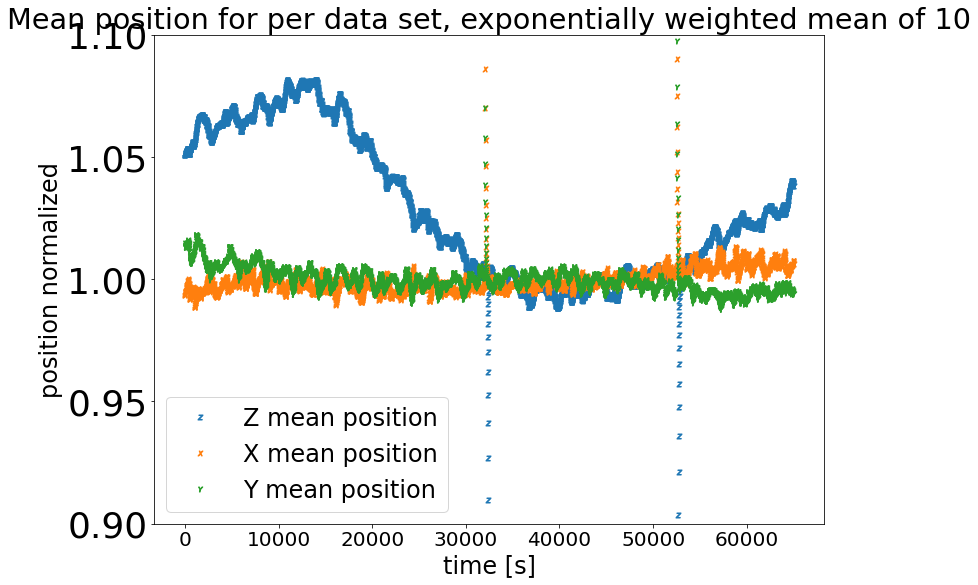

In [12]:
span = 10
df = df_data_red_b[0:6500]
x = np.arange(0,len(df)*10,10)

plt.plot(x,np.divide(df.z_mean.ewm(span=span,adjust=True).mean(),df.z_mean.mean()),label="Z mean position",linestyle="",marker="$Z$",markersize=5)
plt.plot(x,np.divide(df.x_mean.ewm(span=span,adjust=True).mean(),df.x_mean.mean()),label="X mean position",linestyle="",marker="$X$",markersize=5)
plt.plot(x,np.divide(df.y_mean.ewm(span=span,adjust=True).mean(),df.y_mean.mean()),label="Y mean position",linestyle="",marker="$Y$",markersize=5)
plt.xlabel("time [s]")
plt.ylabel("position normalized")
plt.legend()
plt.ylim(0.9,1.1)
plt.title("Mean position for per data set, exponentially weighted mean of %s" %span)
plt.show()

No handles with labels found to put in legend.


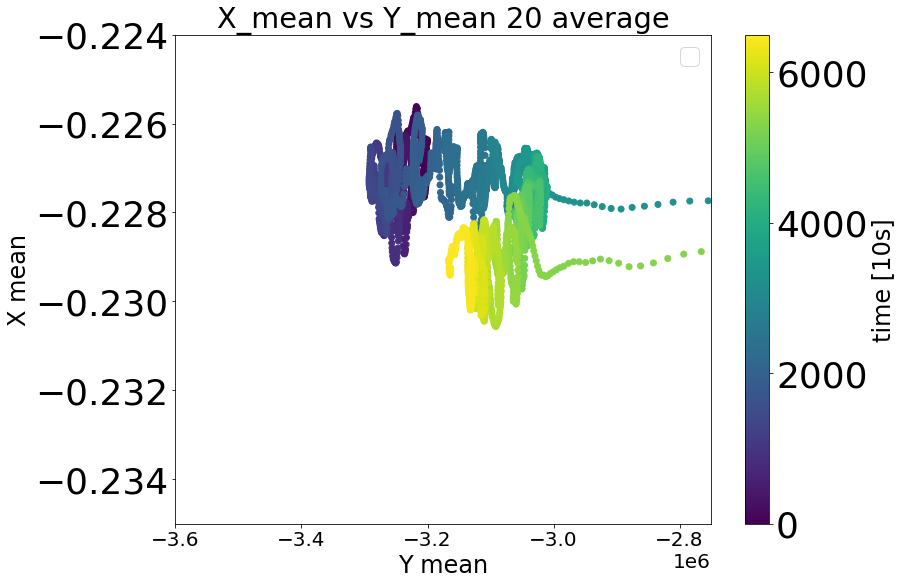

In [13]:
#df = df_data_b_red[0:6500]
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
caxis = df.index
x = np.arange(0,len(df)*10,10)
span = 20
y2= df.z_mean.ewm(span=span,adjust=True).mean()
y3= df.x_mean.ewm(span=span,adjust=True).mean()
s=plt.scatter(y2,y3,c=caxis,cmap=cm)
#plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
#plt.ylabel("PSD %d [a.u.]" %(i+2))
#plt.xlabel("PSD %d [a.u.]" %(i+1))
plt.xlabel("Y mean")
plt.ylabel("X mean")
plt.title("X_mean vs Y_mean %d average" %span)
plt.xlim(-0.36e7,-0.275e7)
plt.ylim(-0.235,-0.224)
plt.legend()
plt.show()


No handles with labels found to put in legend.


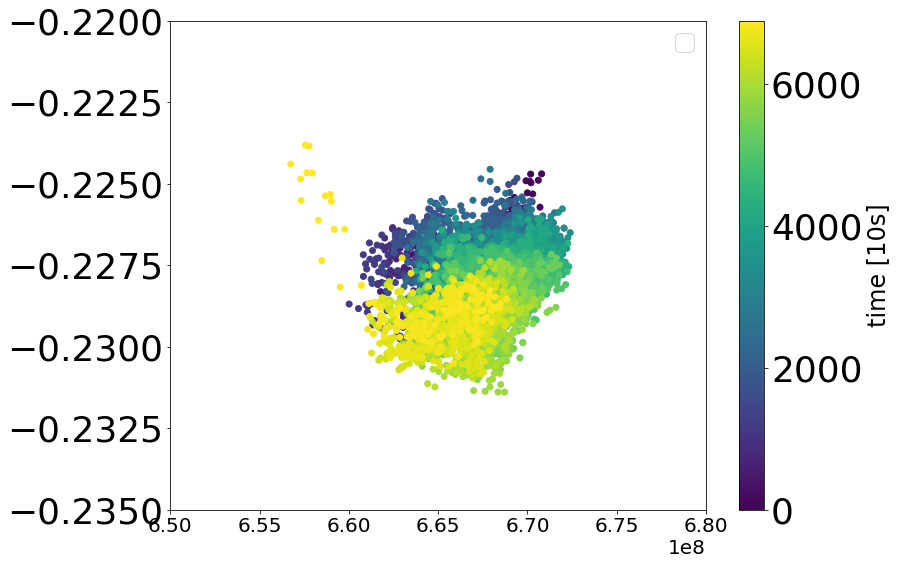

In [109]:
#df = df_data_b_red[0:6500]
df_int = df_data_red_b.x_mean
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
caxis = df_data_red_b.index
x = np.arange(0,len(df)*10,10)
span = 1
y2= df_data_red_b.qpd_sum_mean.ewm(span=span,adjust=True).mean()
y3= df_int.ewm(span=span,adjust=True).mean()
s=plt.scatter(y2,y3,c=caxis,cmap=cm)
#plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
#plt.ylabel("PSD %d [a.u.]" %(i+2))
#plt.xlabel("PSD %d [a.u.]" %(i+1))
plt.xlim(0.65e9,0.68e9)
plt.ylim(-0.235,-0.22)
plt.legend()
plt.show()


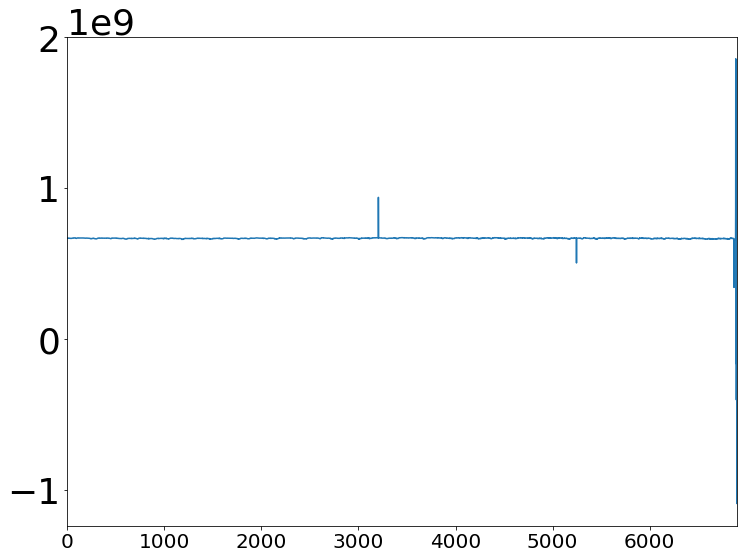

In [77]:
df_data_red_b.qpd_sum_mean.plot()

In [7]:
def compare_xzy_spin_amp_with_pearson(corr_par,corr_val,pars,df_data,df_spin,corr_with,spin=True,plot=True,title=None):
    par_of_interest = corr_val
    x_list = []
    y_list = []
    spin_list = []
    z_list = []
    if(spin==True): df = df_spin
    if(spin==False): df =df_data     
        
    for i in pars:
        x_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_data["%s_%d" %(corr_with[0],i)]))
        y_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_data["%s_%d" %(corr_with[1],i)]))
        z_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_data["%s_%d" %(corr_with[2],i)]))
        spin_list.append(df["%s_%d" %(corr_par,par_of_interest)].corr(df_spin["%s_%d" %(corr_with[3],i)]))
    #print("Freq:",par_of_interest)
    #print(np.argmax(x_list),(np.argmin(x_list)))
    #print(np.argmax(y_list),(np.argmin(y_list)))
    #print(np.argmax(z_list),(np.argmin(z_list)))
    #print(np.argmax(spin_list),(np.argmin(spin_list)))
    if(plot==True):
        if(title!=None):
            title = title
            plt.title(title)
        else:    
            plt.title("correlation with %s_%d" %(corr_par,par_of_interest))
        plt.plot(pars,x_list,marker="$X$",linestyle="--",markersize=12,label="%s" %corr_with[0])
        plt.plot(pars,y_list,marker="$Y$",linestyle="--",markersize=12,label="%s" %corr_with[1])
        plt.plot(pars,z_list,marker="$Z$",linestyle="--",markersize=12,label="%s" %corr_with[2])
        plt.plot(pars,spin_list,marker="$S$",linestyle="--",markersize=12,label="%s" %corr_with[3])
        plt.axhline(0, color ="red")
        plt.ylabel("pearson coefficient")
        plt.xlabel("frequency")
        plt.legend()
        plt.show()
    return x_list,y_list,z_list,spin_list

In [11]:
test_df = df_spin_red.sample(frac=1).reset_index(drop=True)


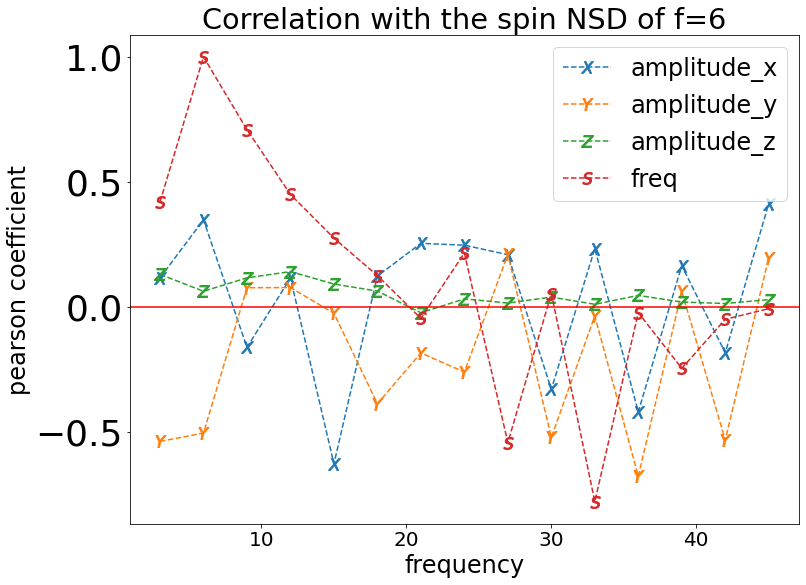

In [19]:
corr_with = ["amplitude_x","amplitude_y","amplitude_z","freq"]
title = "Correlation with the spin NSD of f=6"
c = compare_xzy_spin_amp_with_pearson(corr_par="freq",corr_val=6,pars=np.arange(3,48,3),df_data=df_data_red,df_spin=df_spin_red,corr_with = corr_with,spin=True,title=title)

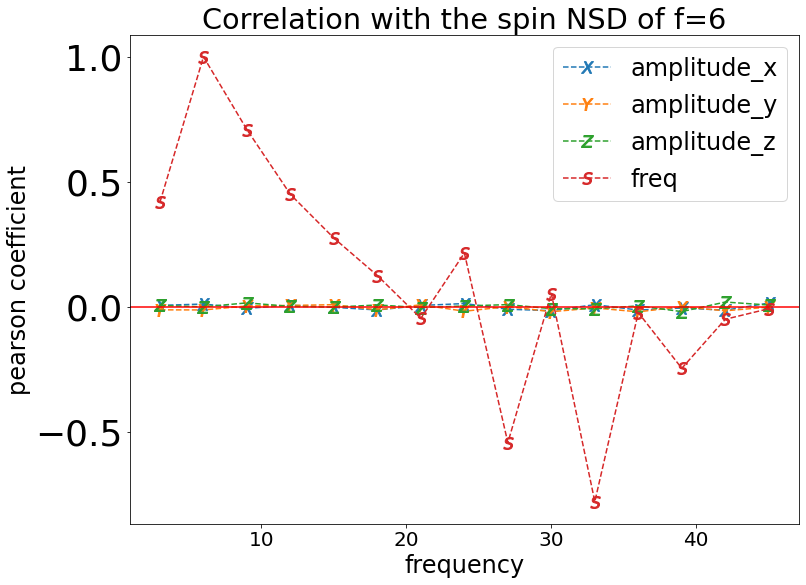

In [18]:
corr_with = ["amplitude_x","amplitude_y","amplitude_z","freq"]
title = "Correlation with the spin NSD of f=6"
c = compare_xzy_spin_amp_with_pearson(corr_par="freq",corr_val=6,pars=np.arange(3,48,3),df_data=df_data_red,df_spin=test_df,corr_with = corr_with,spin=True,title=title)

In [57]:
test_df2 = pd.concat([df_spin_red[3000:4000],df_spin_red[0:1000],
                      df_spin_red[6000:7000],df_spin_red[9000:10000],
                      df_spin_red[1000:2000],df_spin_red[2000:3000],
                      df_spin_red[7000:8000],df_spin_red[5000:6000],
                      df_spin_red[5000:6000]])


In [58]:
test_df2 = test_df2.reset_index()

In [59]:
xsum_sum = []
ysum_sum = []
zsum_sum = []
ssum_sum = []

corr_with = ["amplitude_x","amplitude_y","amplitude_z","freq"]
for chunk in tqdm(np.arange(1000,9550,1000)):
    xsum = []
    ysum = []
    zsum =[]
    ssum = []
    for i in np.arange(3,48,3):
        df_d = df_data_red[chunk-1000:chunk]
        df_s = test_df2[chunk-1000:chunk]
        xsum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[0])))
        ysum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[1])))
        zsum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[2])))
        ssum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[3])))
    if(chunk==1000):
        d_1k = [xsum,ysum,zsum,ssum]
    if(chunk==6000):
        d_6k = [xsum,ysum,zsum,ssum]
    xsum_sum.append(np.sum(xsum))    
    ysum_sum.append(np.sum(ysum))    
    zsum_sum.append(np.sum(zsum))    
    ssum_sum.append(np.sum(ssum))    


100%|██████████| 9/9 [00:06<00:00,  1.41it/s]


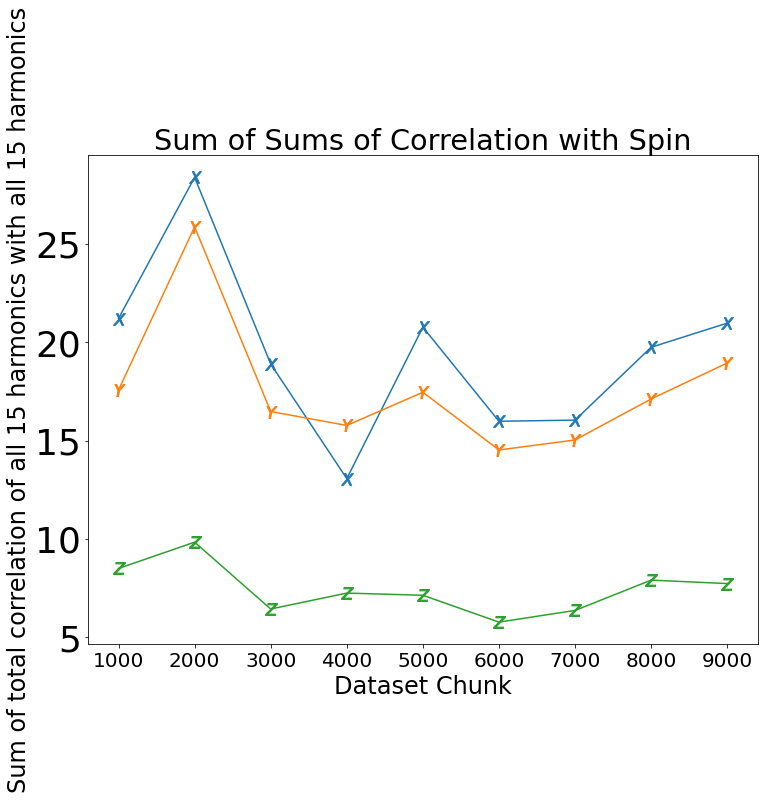

In [60]:
x = np.arange(1000,10000,1000)
plt.plot(x,np.divide(xsum_sum,1),marker="$X$",markersize=12)
plt.plot(x,np.divide(ysum_sum,1),marker="$Y$",markersize=12)
plt.plot(x,np.divide(zsum_sum,1),marker="$Z$",markersize=12)
#plt.plot(x,np.divide(ssum_sum,1),marker="$S$",markersize=12)
plt.title("Sum of Sums of Correlation with Spin")
plt.ylabel("Sum of total correlation of all 15 harmonics with all 15 harmonics")
plt.xlabel("Dataset Chunk")
plt.show()

In [61]:
xsum_sum = []
ysum_sum = []
zsum_sum = []
ssum_sum = []

corr_with = ["amplitude_x","amplitude_y","amplitude_z","freq"]
for chunk in tqdm(np.arange(1000,10000,1000)):
    xsum = []
    ysum = []
    zsum =[]
    ssum = []
    for i in np.arange(3,48,3):
        df_d = df_data_red[chunk-1000:chunk]
        df_s = test_df[chunk-1000:chunk]
        xsum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[0])))
        ysum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[1])))
        zsum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[2])))
        ssum.append(np.sum(np.abs(compare_xzy_spin_amp_with_pearson(corr_par=str(corr_with[3]),corr_val=i,pars=np.arange(3,48,3),df_data=df_d,df_spin=df_s,corr_with = corr_with,spin=True,plot=False)[3])))
    if(chunk==1000):
        d_1k = [xsum,ysum,zsum,ssum]
    if(chunk==6000):
        d_6k = [xsum,ysum,zsum,ssum]
    xsum_sum.append(np.sum(xsum))    
    ysum_sum.append(np.sum(ysum))    
    zsum_sum.append(np.sum(zsum))    
    ssum_sum.append(np.sum(ssum))    


100%|██████████| 9/9 [00:06<00:00,  1.32it/s]


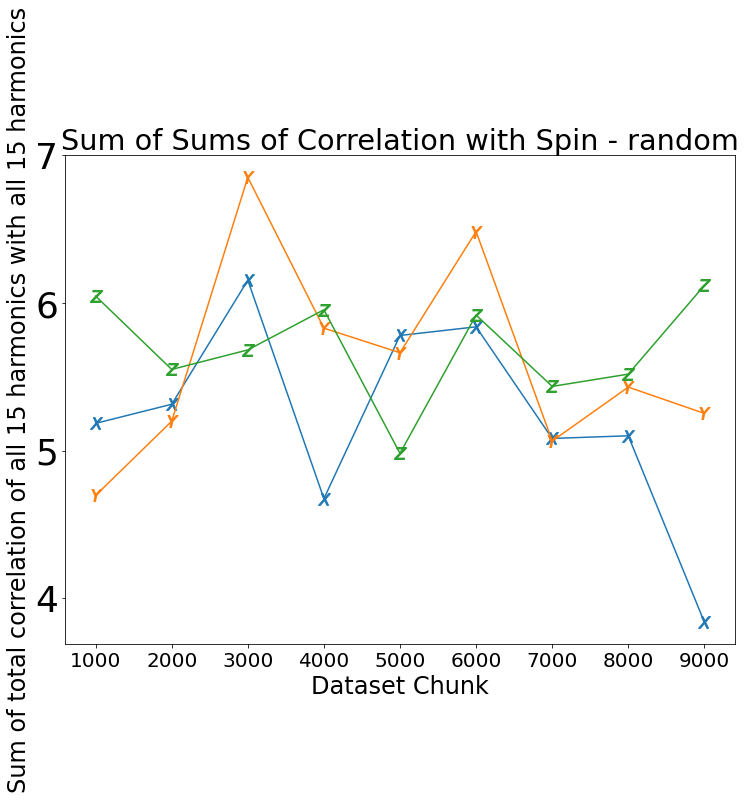

In [62]:
x = np.arange(1000,10000,1000)
plt.plot(x,np.divide(xsum_sum,1),marker="$X$",markersize=12)
plt.plot(x,np.divide(ysum_sum,1),marker="$Y$",markersize=12)
plt.plot(x,np.divide(zsum_sum,1),marker="$Z$",markersize=12)
#plt.plot(x,np.divide(ssum_sum,1),marker="$S$",markersize=12)
plt.title("Sum of Sums of Correlation with Spin - random")
plt.ylabel("Sum of total correlation of all 15 harmonics with all 15 harmonics")
plt.xlabel("Dataset Chunk")
plt.show()

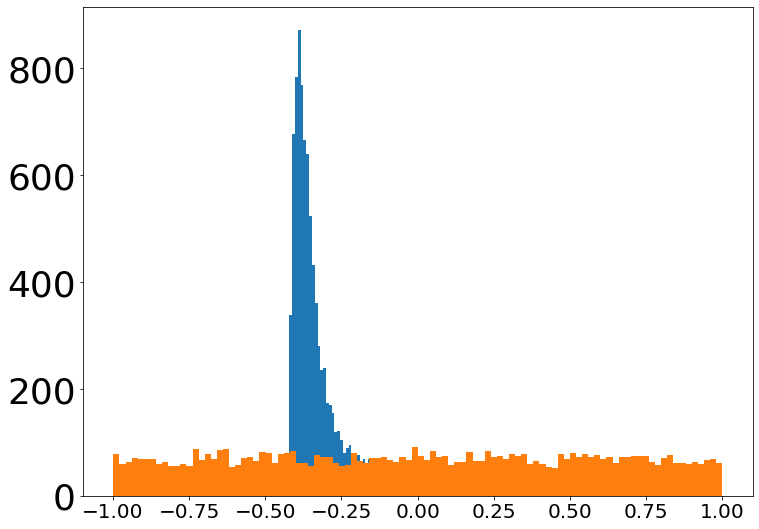

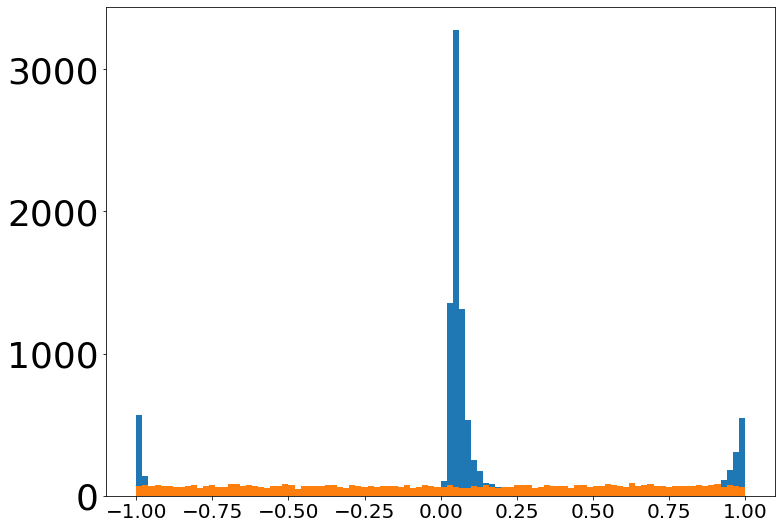

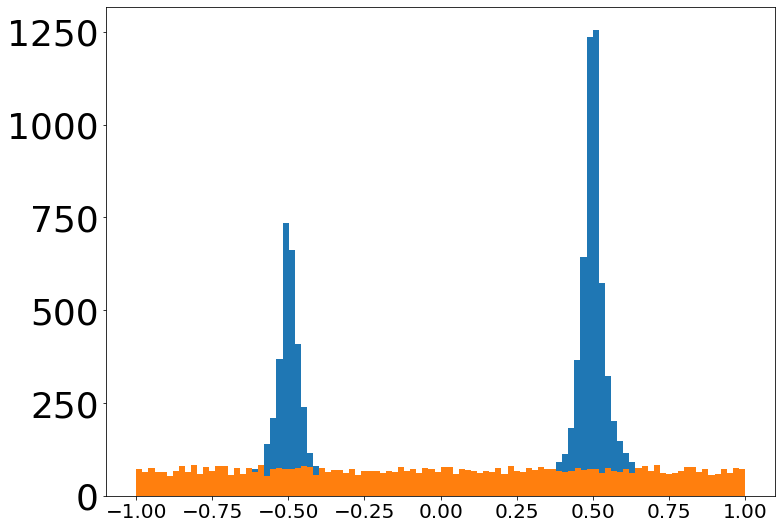

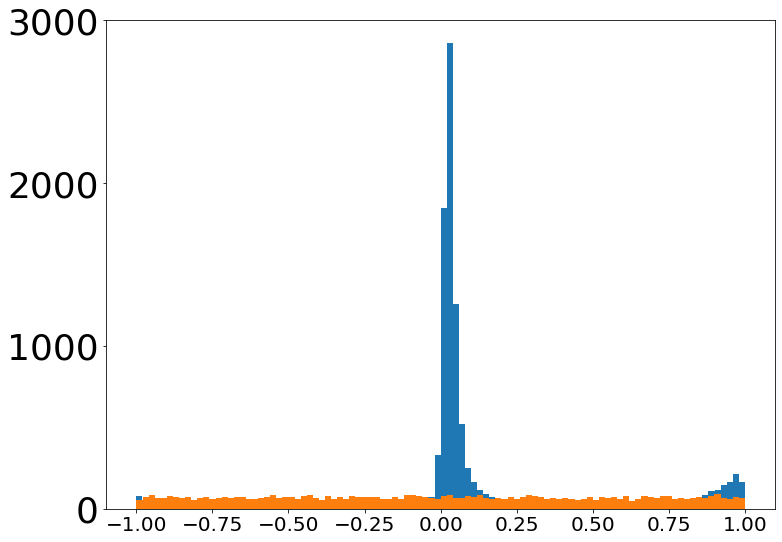

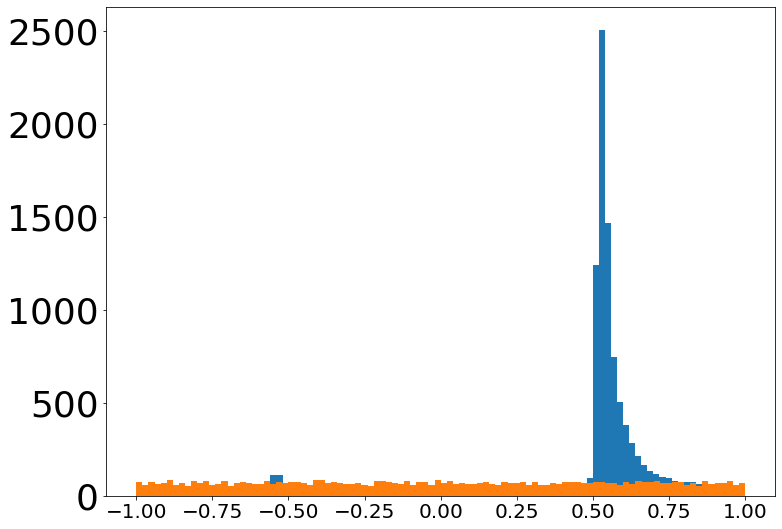

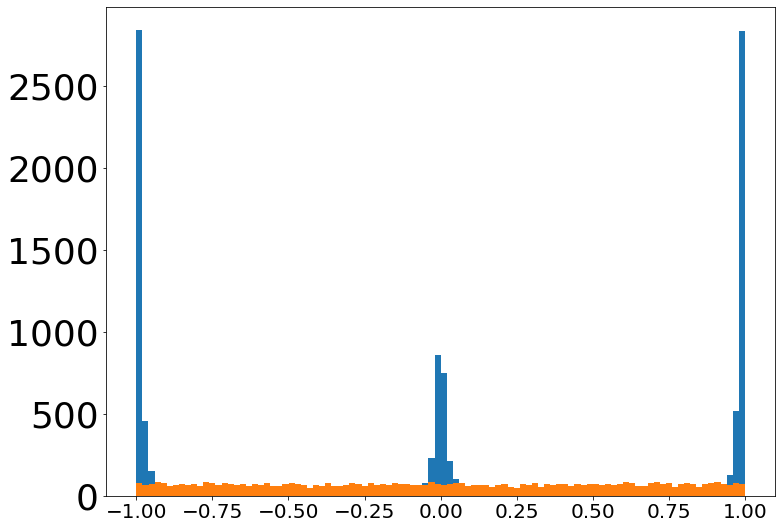

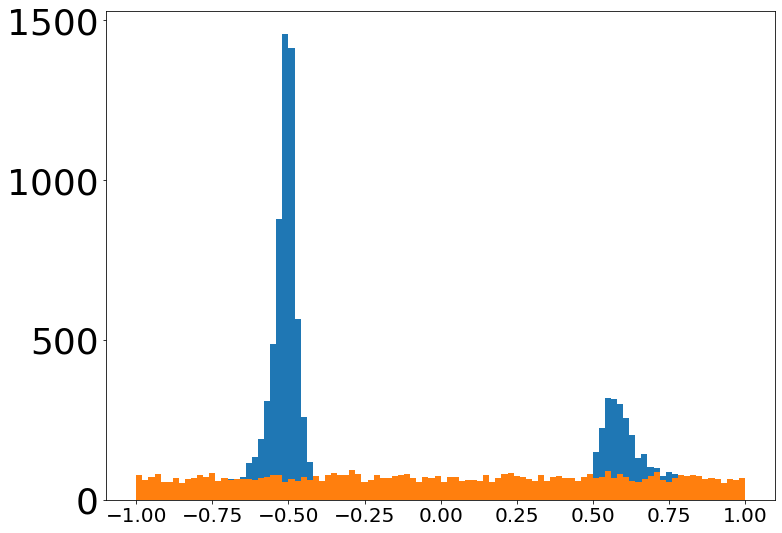

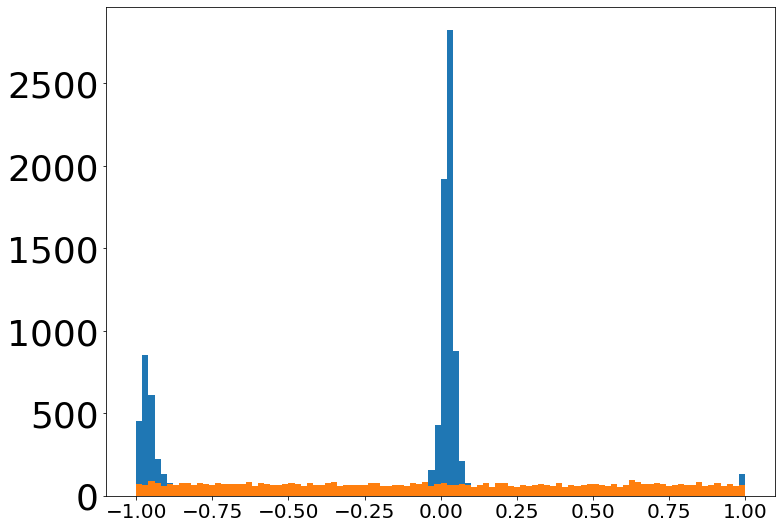

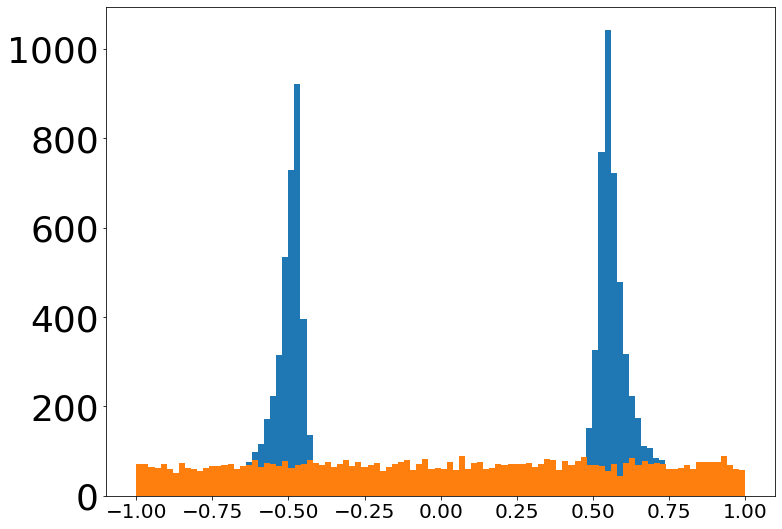

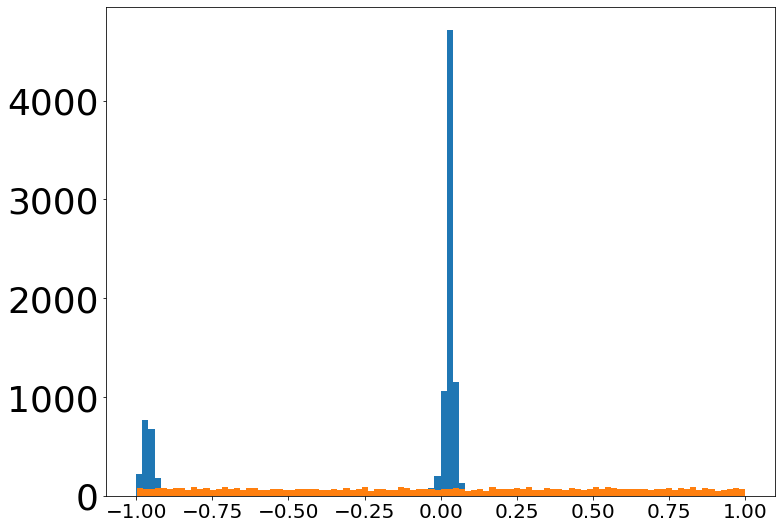

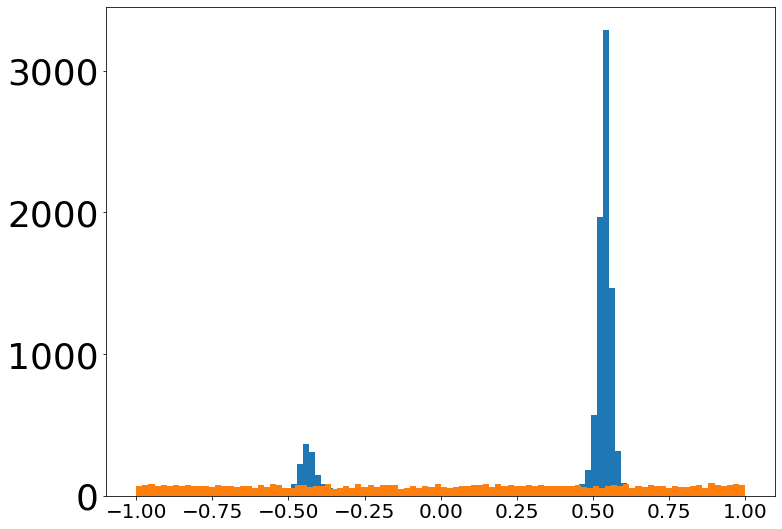

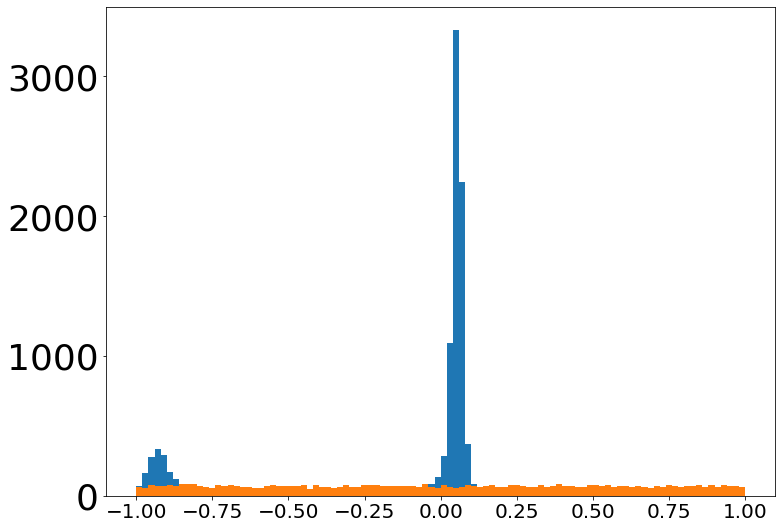

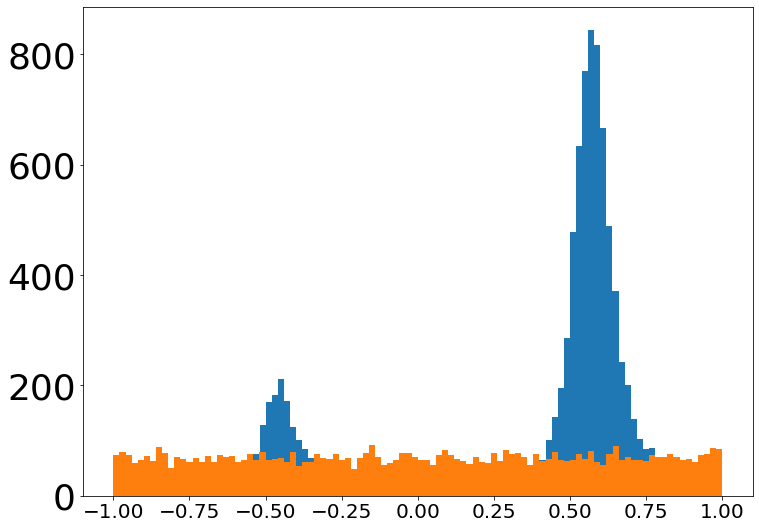

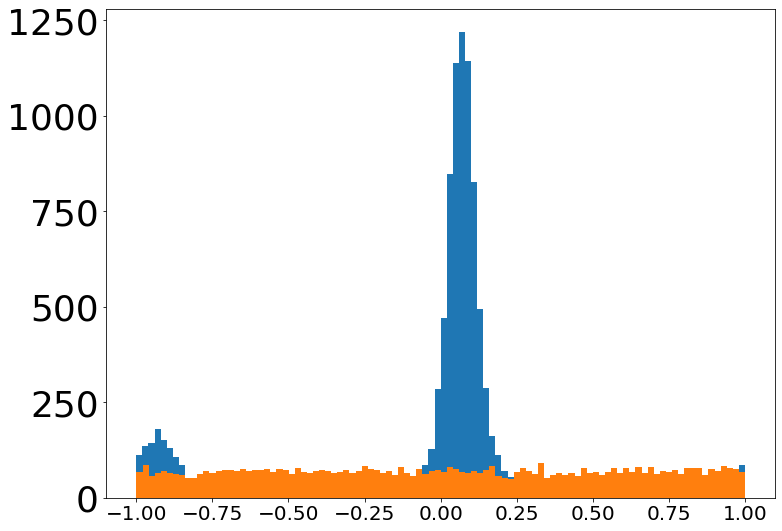

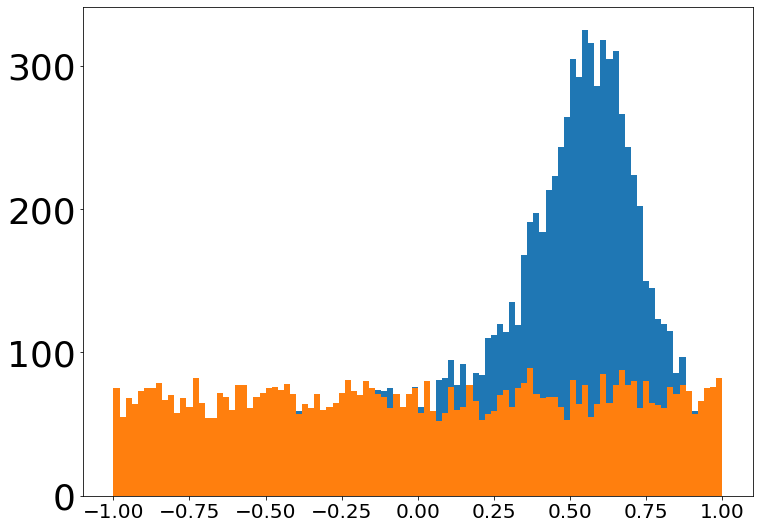

In [102]:
# look at phases
bins = 100
var_of_interest= "phase_y"
for i in np.arange(3,48,3):
    plt.hist(df_data_red["%s_%d" %(var_of_interest,i)]/3/np.pi,bins=bins, label="shaking")
    plt.hist(df_data_red_b["%s_%d"%(var_of_interest,i)]/3/np.pi,bins=bins, label="no_shaking")
 
    #plt.savefig("Plots/z_phase_%d_shake_vs_no_shake" %i, dpi=150, bbox_inches="tight")
    plt.show()

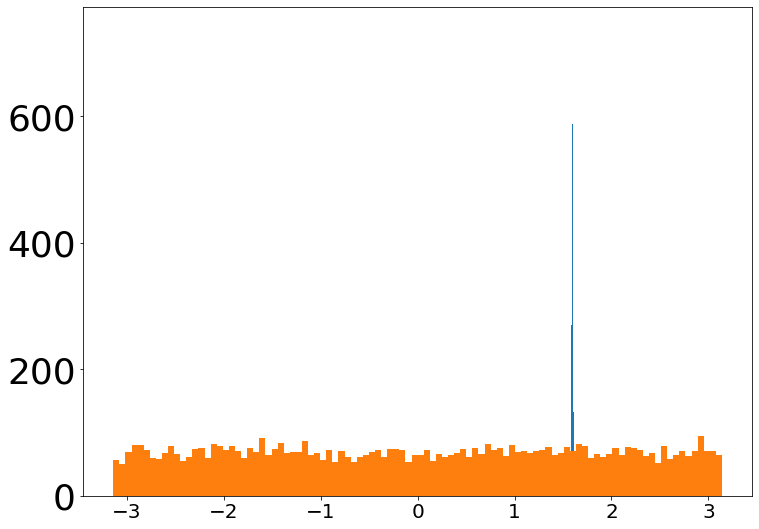

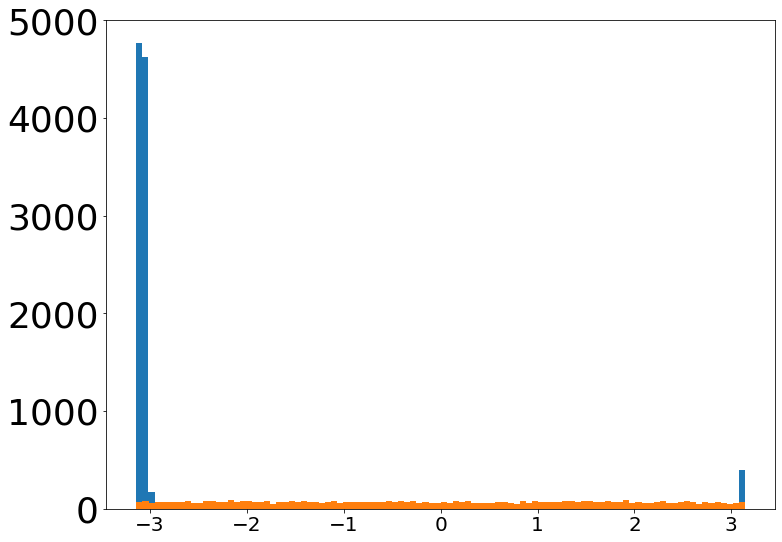

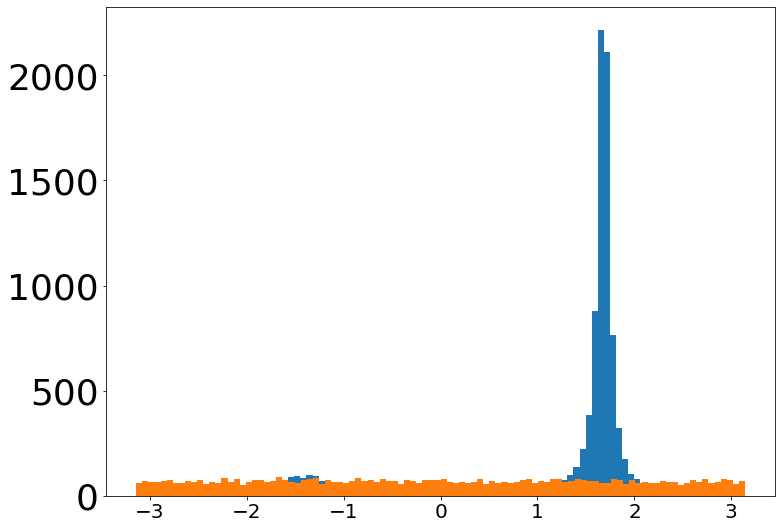

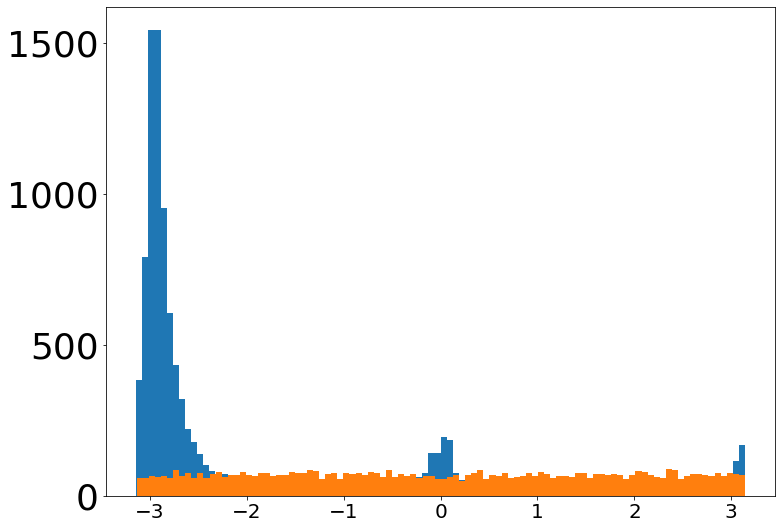

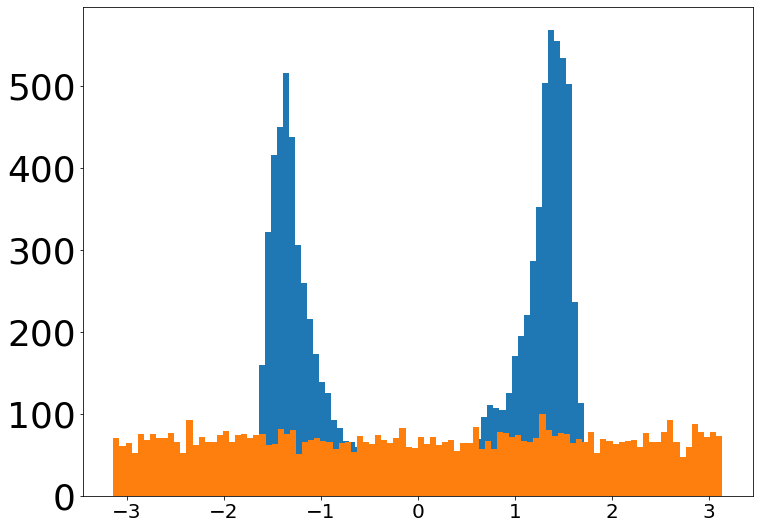

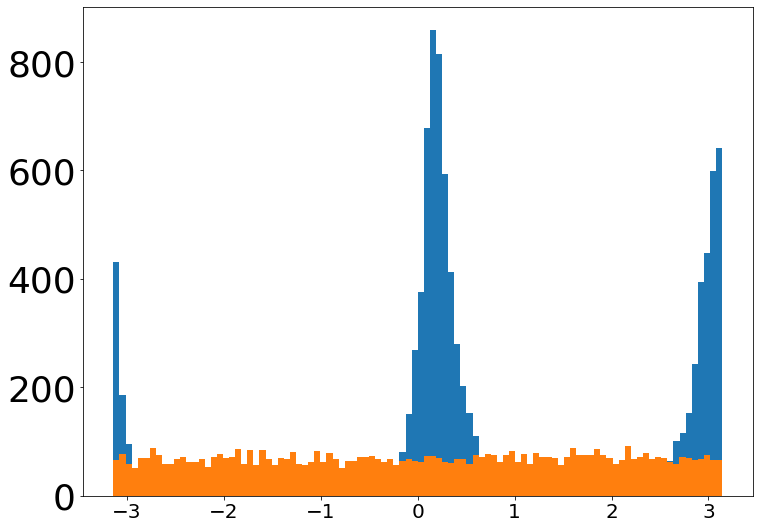

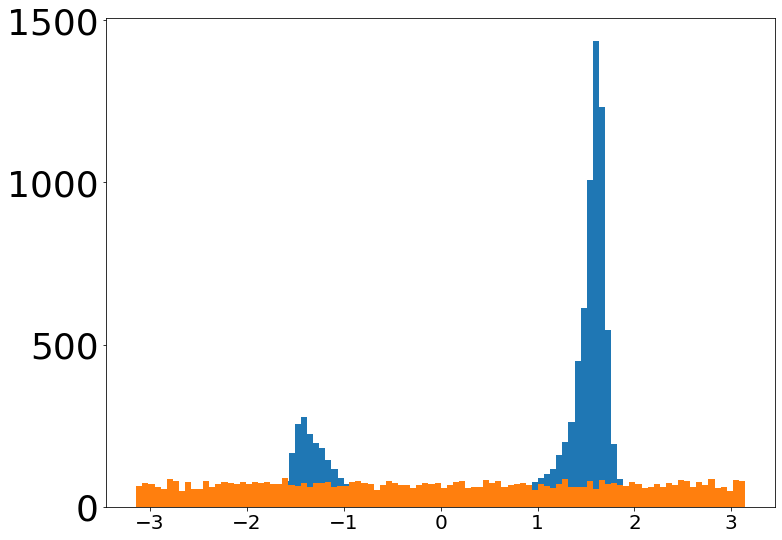

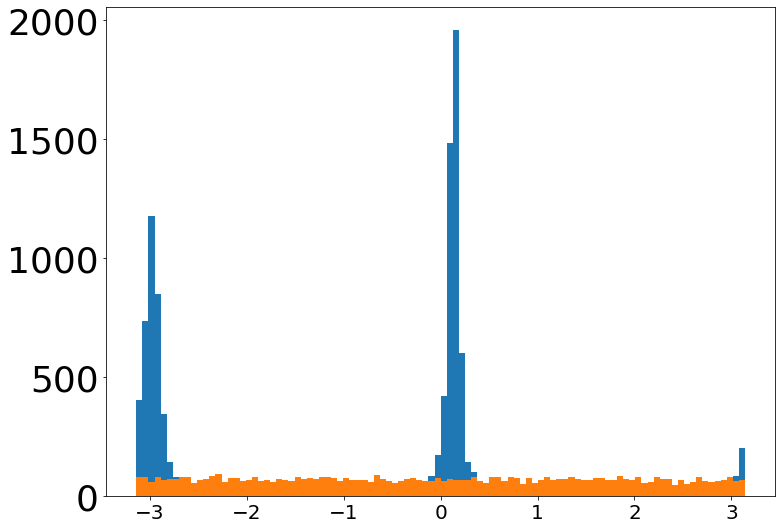

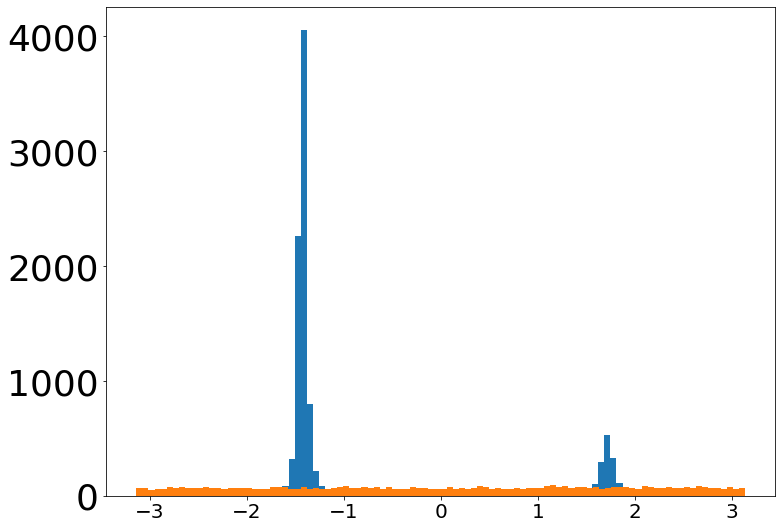

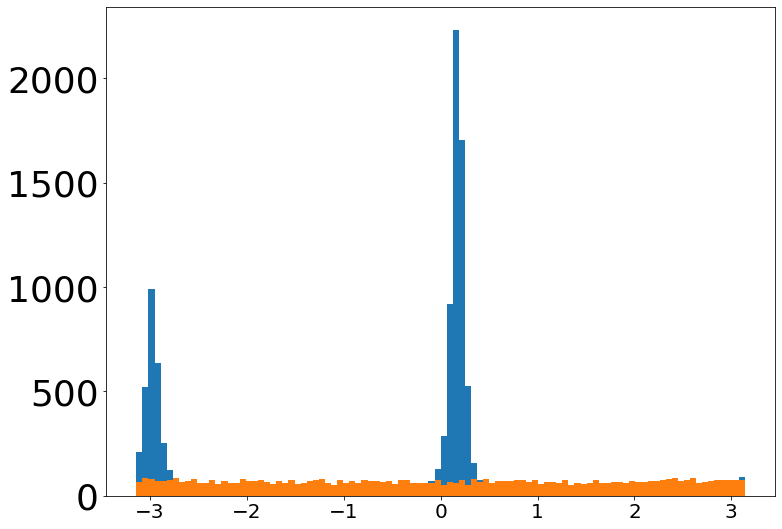

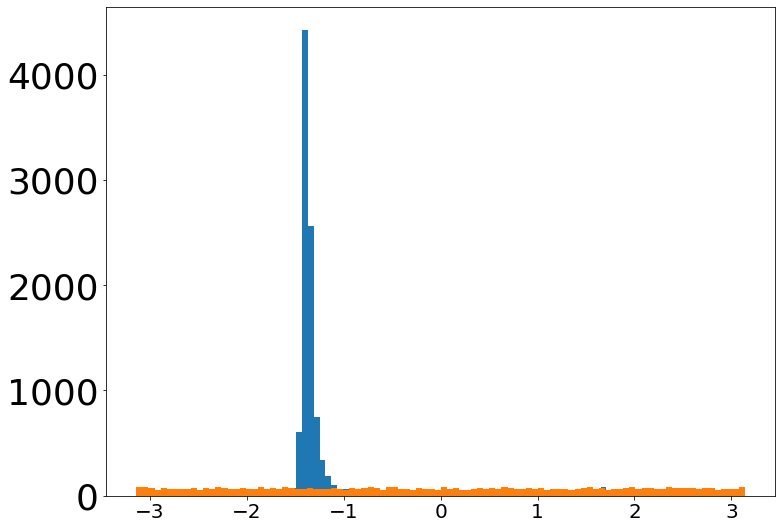

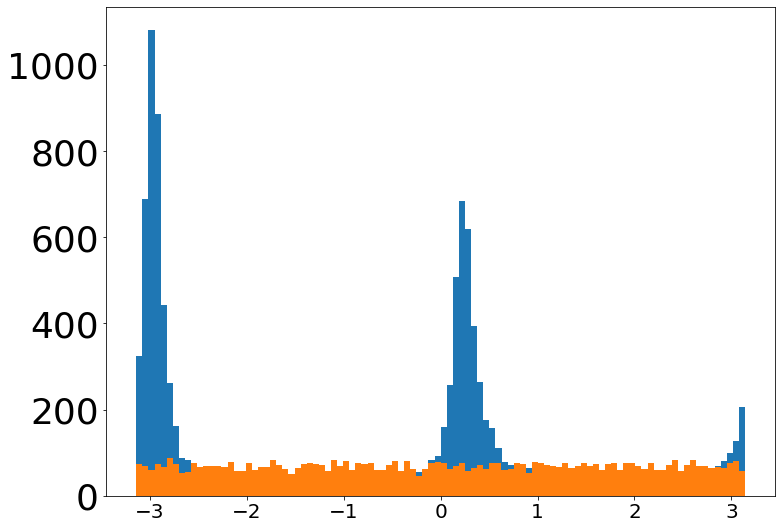

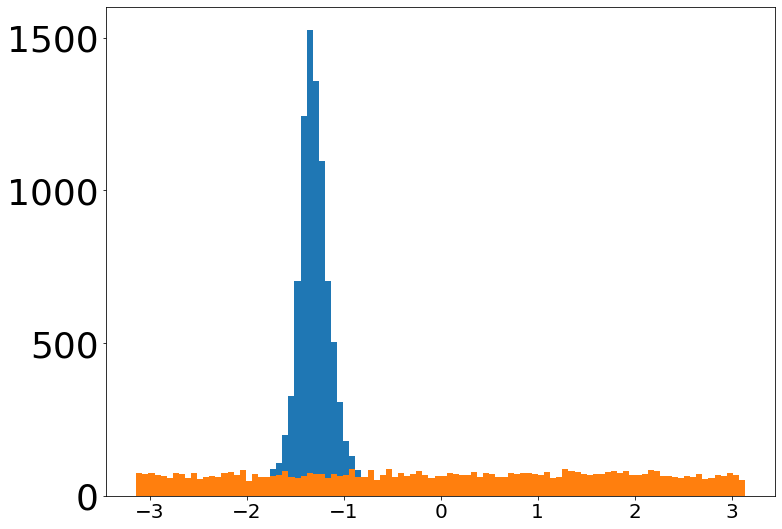

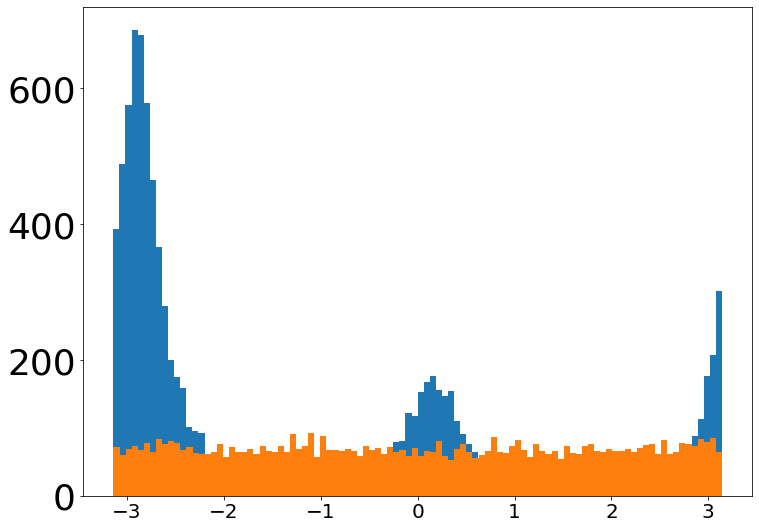

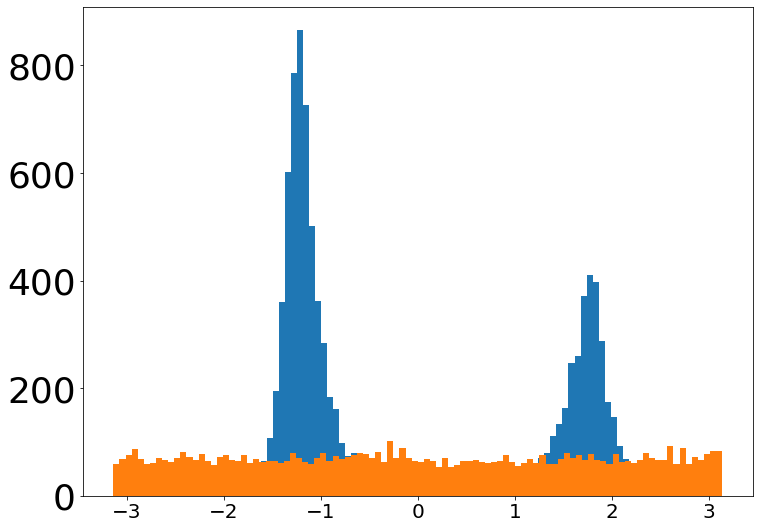

In [110]:
# look at phases
bins = 100
var_of_interest= "phase"
for i in np.arange(3,48,3):
    plt.hist(df_spin_red["%s_%d" %(var_of_interest,i)],bins=bins, label="shaking")
    plt.hist(df_spin_red_b["%s_%d"%(var_of_interest,i)],bins=bins, label="no_shaking")
 
    #plt.savefig("Plots/z_phase_%d_shake_vs_no_shake" %i, dpi=150, bbox_inches="tight")
    plt.show()

In [114]:
@gif.frame
def hist1(x1,x2,var_of_interest,freq,bins):
    plt.figure(figsize=(16, 12), dpi=50)
    plt.hist(x1,bins=bins ,label="shaking")
    plt.hist(x2, bins=bins,label="no_shaking")
    plt.xlabel("phase/$\pi$")
    plt.ylabel("counts")   
    plt.title("%s at %d Hz" %(var_of_interest,freq))
    plt.legend()

    
frames = []
step_size=5
norm=3*np.pi
var_of_interest = "phase"
bins=100
for freq in np.arange(5,60,step_size):
    x1 = df_spin_red["%s_%d" %(var_of_interest,freq)]/norm
    x2 = df_spin_red_b["%s_%d" %(var_of_interest,freq)]/norm
    frame =  hist1(x1,x2,var_of_interest,freq,bins) 
    frames.append(frame)
    #y2 = df_nos1["spin_fft"][i+2*step_size:i+3*step_size].mean()

gif.save(frames, "Plots/phase_comparison_spin_side.gif", duration=1500)


In [165]:
@gif.frame
def plot_phase_time(x1,x2,x3,freq):
    plt.figure(figsize=(16, 12), dpi=50)
    plt.plot(x1,x2,label="x")
    plt.plot(x1,x3,alpha=0.5,label="z")
    plt.xlabel("phase/$\pi$")
    plt.ylabel("counts")   
    plt.title("phase at %d Hz" %(freq))
    plt.legend()

frames = []
step_size=3
norm=3*np.pi
span = 100
for freq in np.arange(3,48,step_size):
    x1 = df_data_red.index
    x2 = df_data_red["phase_x_%d" %freq].ewm(span=span,adjust=True).mean()/norm
    x3 = df_data_red["phase_z_%d" %freq].ewm(span=span,adjust=True).mean()/norm
    frame =  plot_phase_time(x1,x2,x3,freq) 
    frames.append(frame)
    #y2 = df_nos1["spin_fft"][i+2*step_size:i+3*step_size].mean()

gif.save(frames, "Plots/phase_xz_time_evolution_100span.gif", duration=1500)  


Text(0, 0.5, 'phase/$\\pi$')

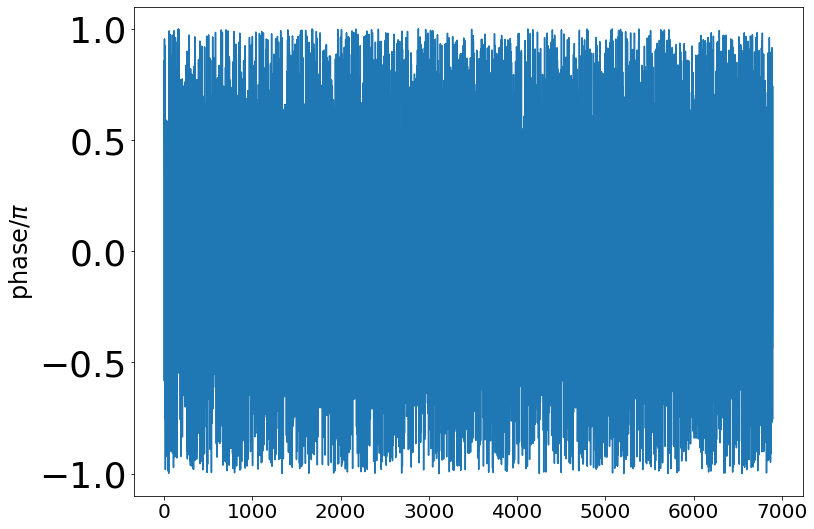

In [151]:

plt.plot(df_data_red_b.index,df_data_red_b.phase_x_3/3/np.pi)
plt.ylabel("phase/$\pi$")
#plt.xlim(0,1000)
#plt.xlim(0,100)

No handles with labels found to put in legend.


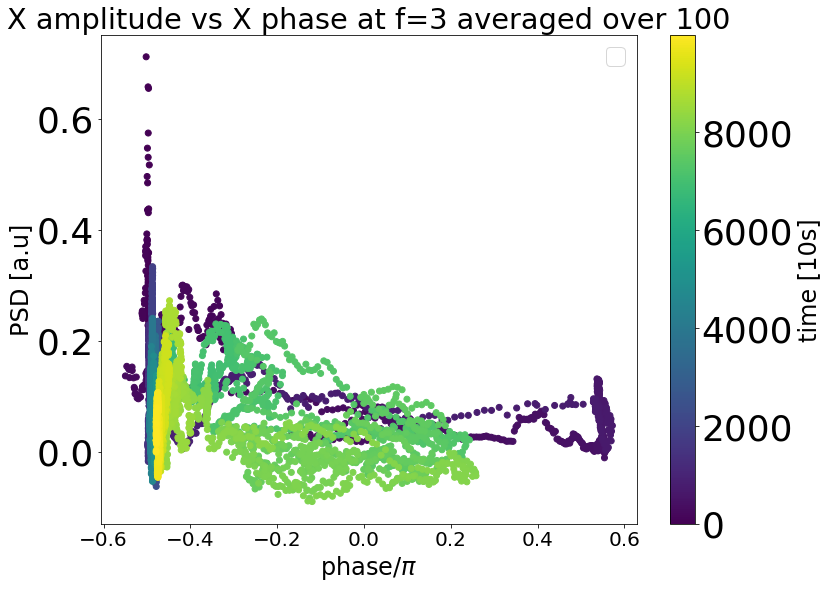

No handles with labels found to put in legend.


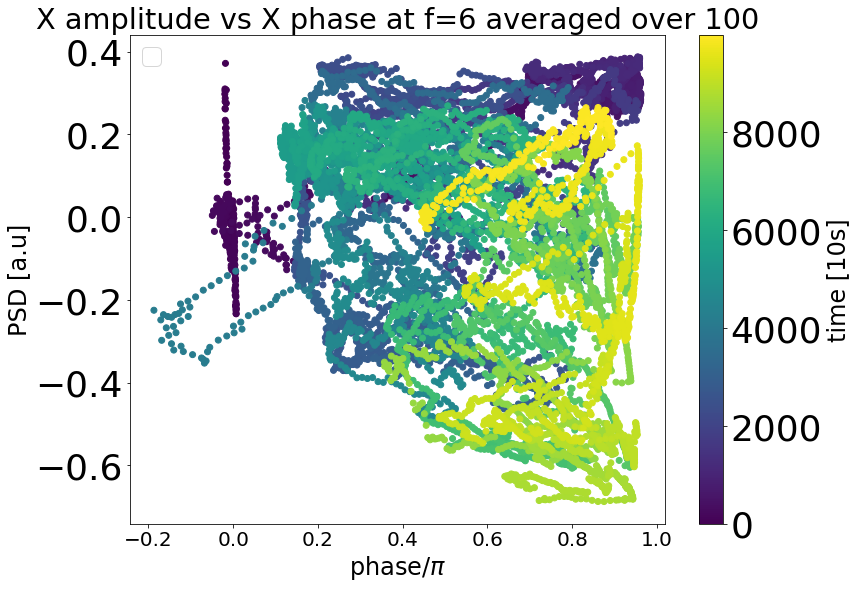

No handles with labels found to put in legend.


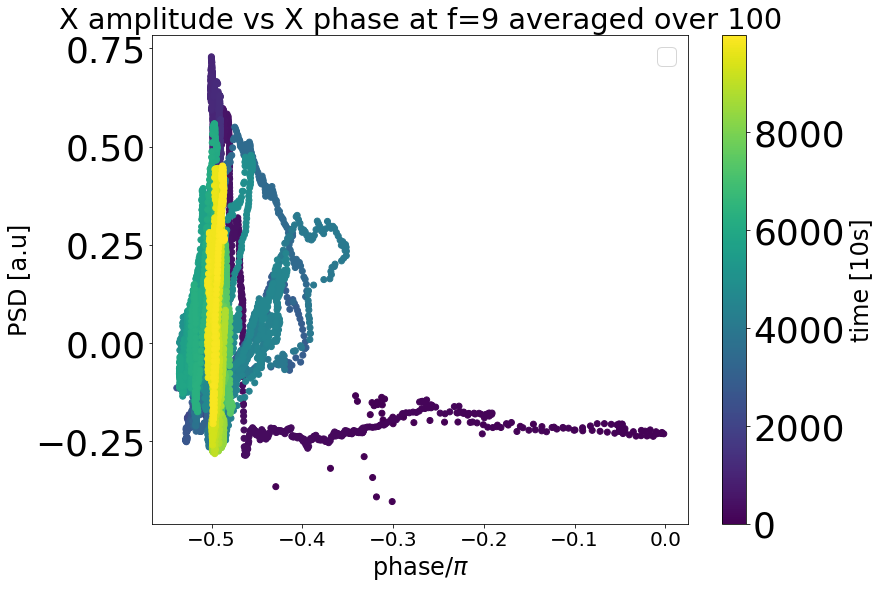

No handles with labels found to put in legend.


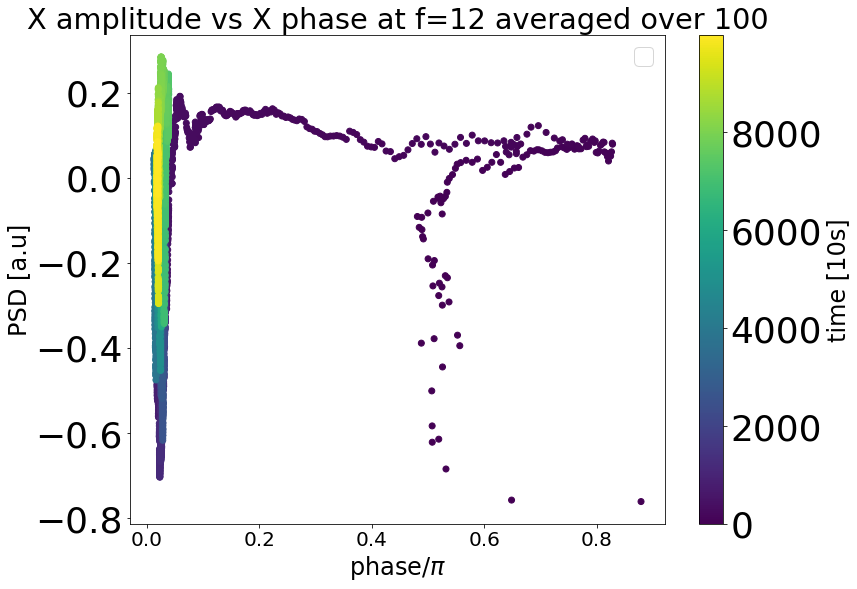

No handles with labels found to put in legend.


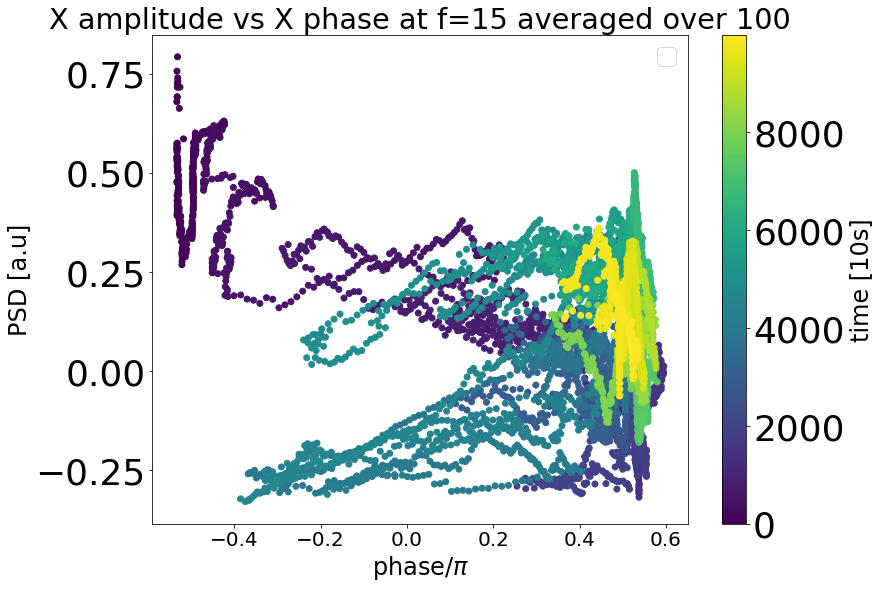

No handles with labels found to put in legend.


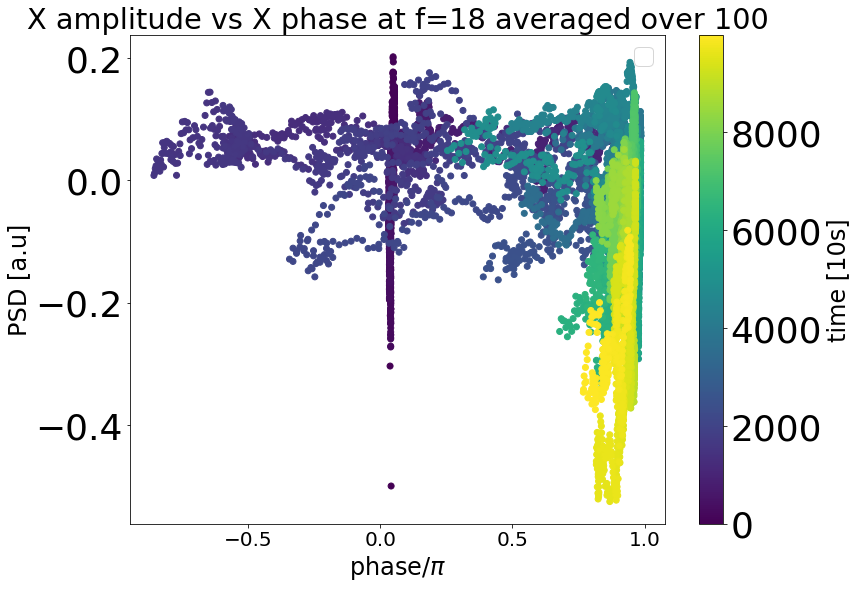

No handles with labels found to put in legend.


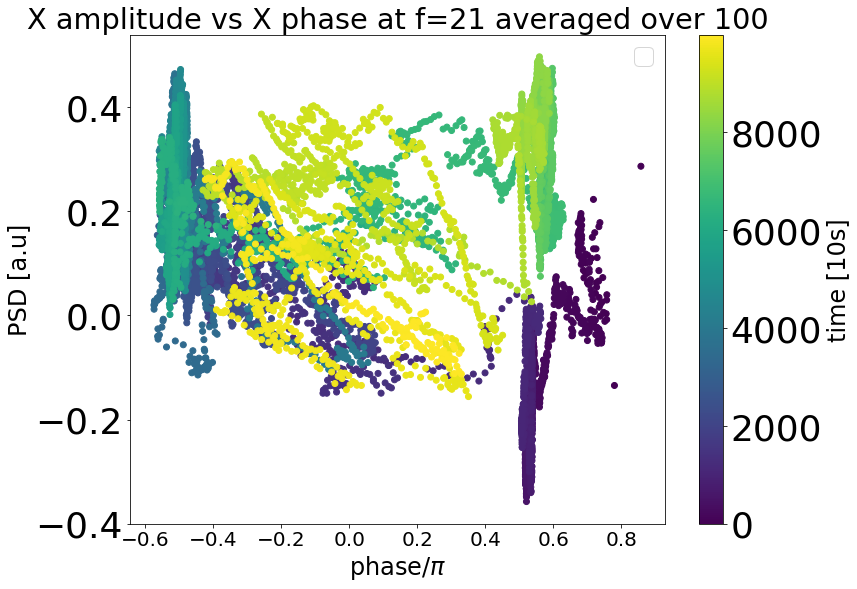

No handles with labels found to put in legend.


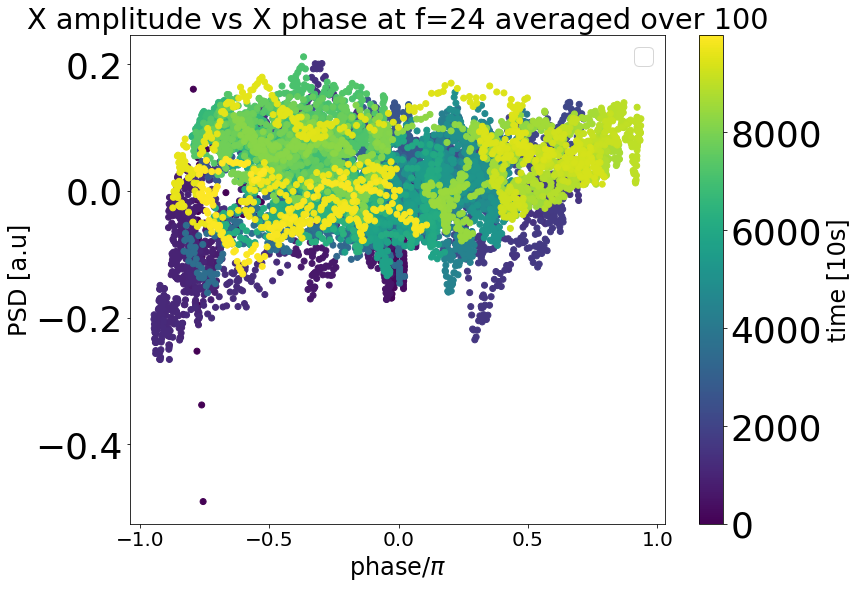

No handles with labels found to put in legend.


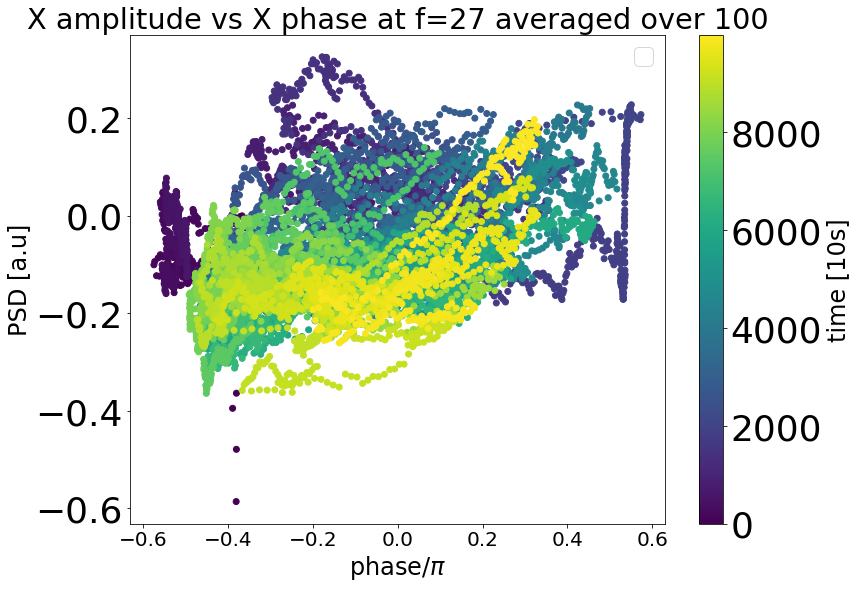

No handles with labels found to put in legend.


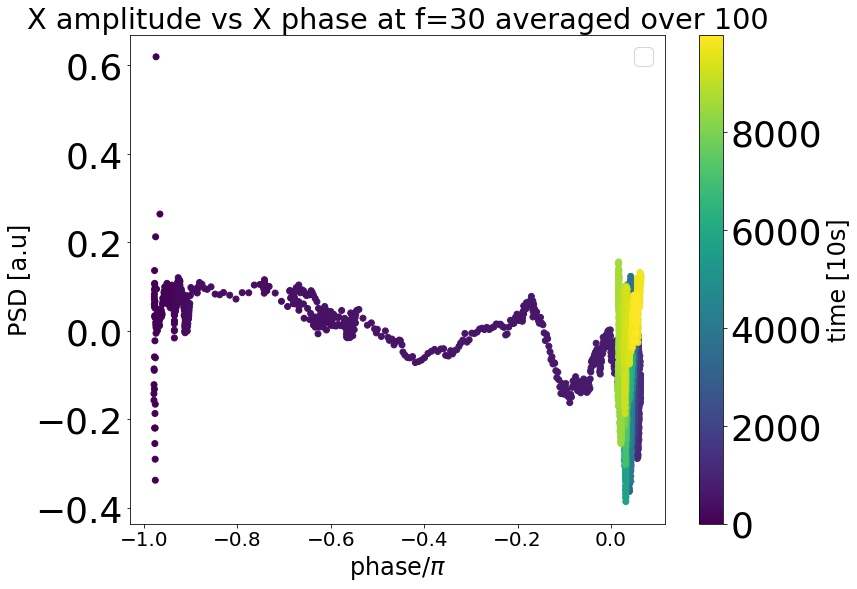

No handles with labels found to put in legend.


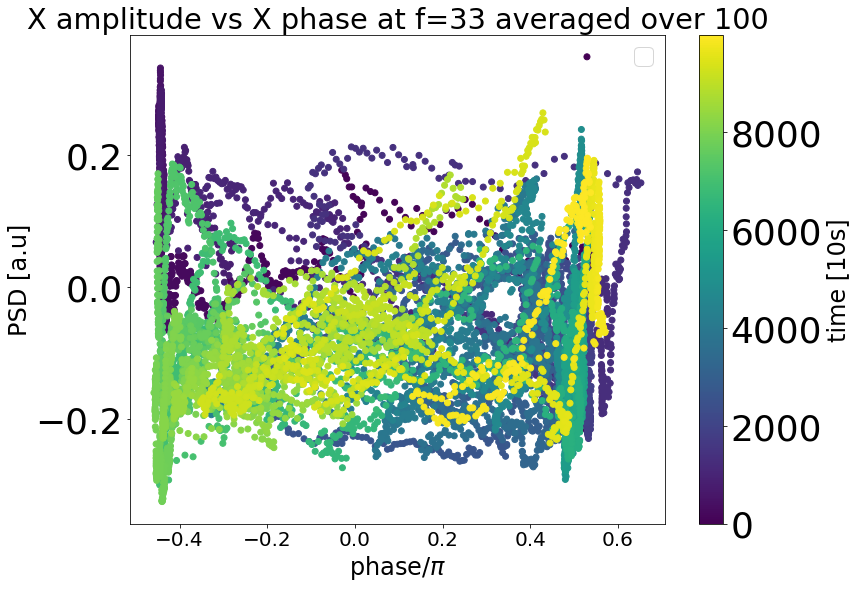

No handles with labels found to put in legend.


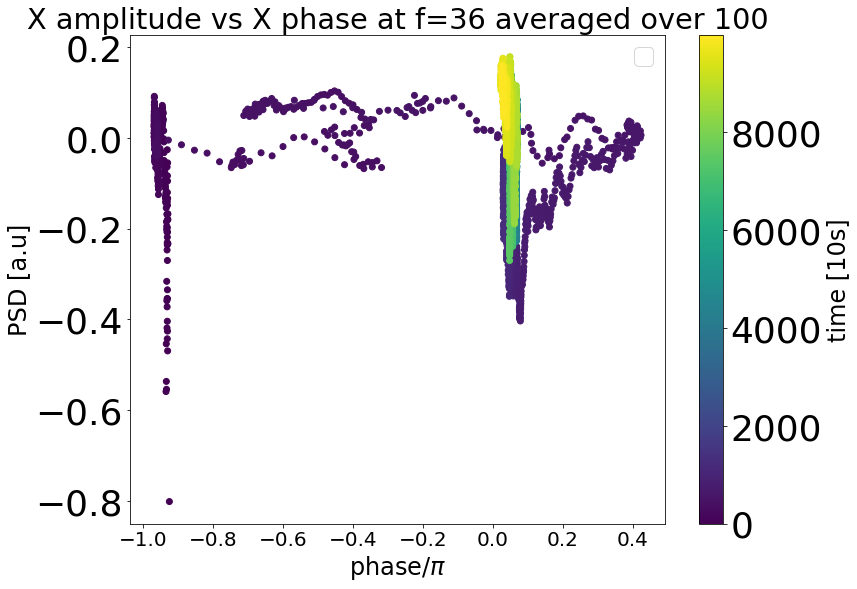

No handles with labels found to put in legend.


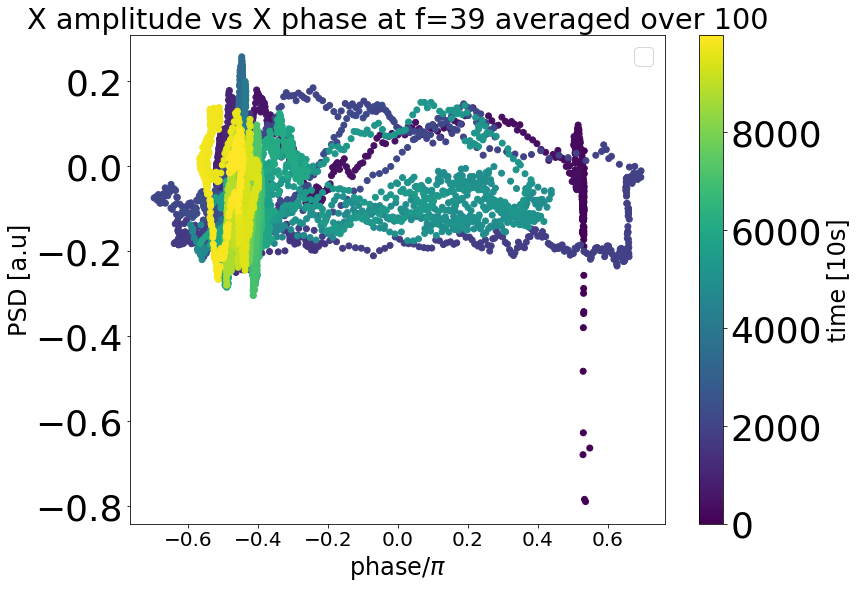

No handles with labels found to put in legend.


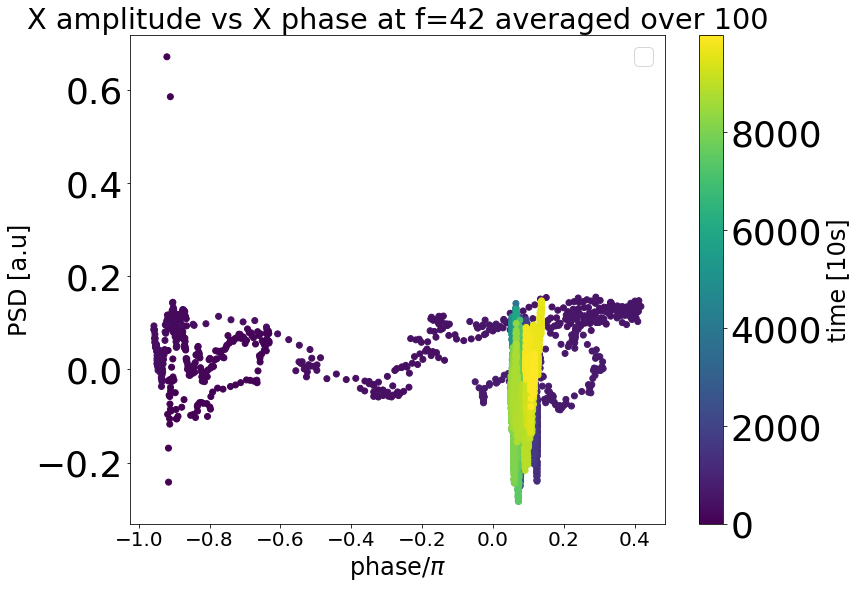

No handles with labels found to put in legend.


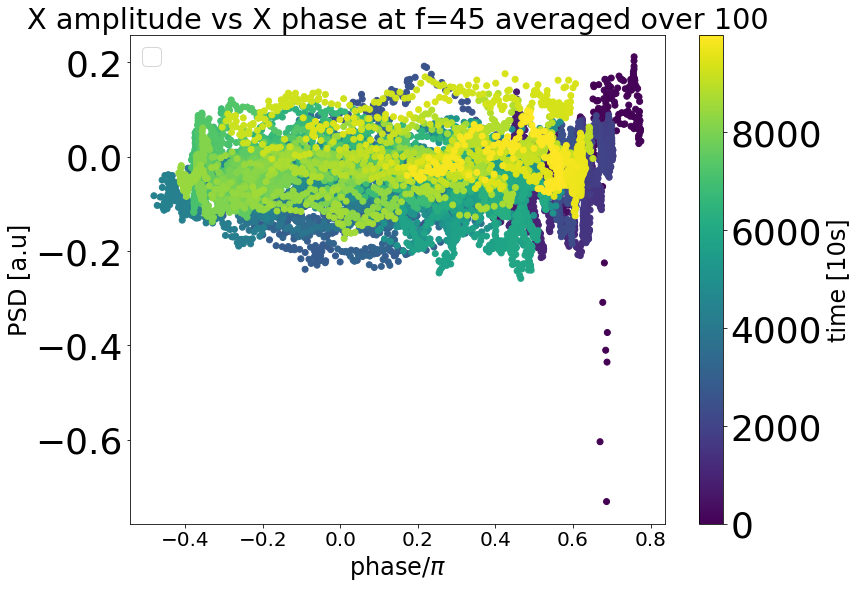

In [213]:
#df = df_data_b_red[0:6500]
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
caxis = df_data_red.index
x = np.arange(0,len(df)*10,10)
harmonic = 12
for i in range(3,48,3):
    harmonic =i 
    span = 100
    y2= np.divide(df_data_red["phase_x_%d" %harmonic].ewm(span=span,adjust=True).mean(),(3*np.pi))
    y3= np.divide(df_data_red["phase_z_%d" %harmonic].ewm(span=span,adjust=True).mean(),(3*np.pi))
    s=plt.scatter(y2,y3,c=caxis,cmap=cm)
    #plt.scatter(y1,y3,label="z vs spin")
    plt.colorbar(s,label="time [10s]")
    #plt.ylabel("PSD %d [a.u.]" %(i+2))
    #plt.xlabel("PSD %d [a.u.]" %(i+1))
    plt.xlabel("phase/$\pi$")
    plt.ylabel("PSD [a.u]")
    plt.title("X amplitude vs X phase at f=%d averaged over %d" %(harmonic,span))
    #plt.xlim(-3.14e-1,3.14e-1)
    #plt.xscale("log")
    #plt.xlim(-0.314,0.314)
    #plt.ylim(-0.235,-0.224)
    plt.legend()
    plt.show()


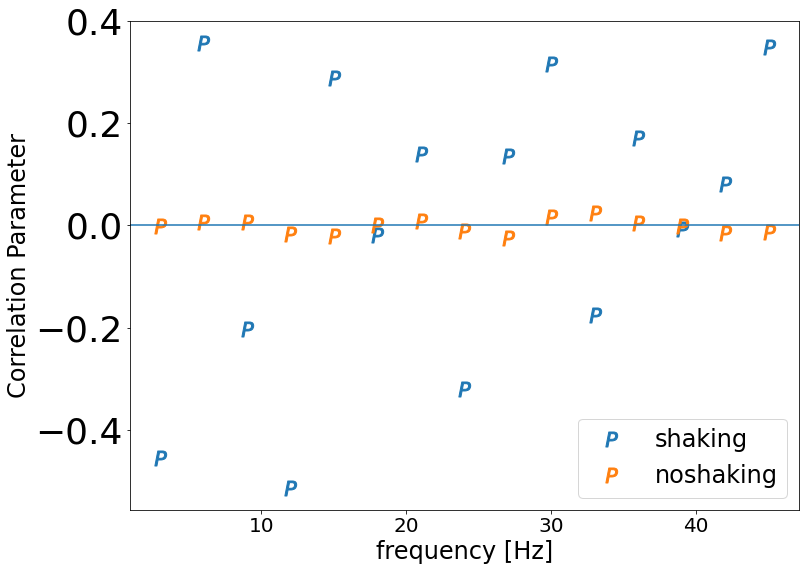

In [233]:
ph_am_corr=[]
ph_am_corr2=[]
x= np.arange(3,48,3)
for i in range(3,48,3):
    ph_am_corr.append(df_data_red["phase_x_%d"%i].corr(df_data_red["amplitude_x_%d"%i]))
    ph_am_corr2.append(df_data_red_b["phase_x_%d"%i].corr(df_data_red_b["amplitude_x_%d"%i]))

plt.plot(x,ph_am_corr,marker="$P$",markersize=15,linestyle="",label="shaking")
plt.plot(x,ph_am_corr2,marker="$P$",markersize=15,linestyle="",label="noshaking")    
plt.ylabel("Correlation Parameter")
plt.xlabel("frequency [Hz]")
plt.axhline(0)
plt.legend()
plt.show()

In [11]:
import gif
@gif.frame
def plot1(norm,x, y,inp):
    plt.figure(figsize=(16, 12), dpi=50)
    plt.plot(x,norm)
    plt.plot(x, y)
    plt.yscale("log")
    plt.ylim(1e-11,1e-3)
    plt.xlim(0,100)
    plt.xlabel("frequency [Hz]")
    plt.ylabel("PSD [a.u.]")
    plt.title("dataset %d" %inp)
    #plt.legend()
    
frames = []
x = np.arange(0,2500.1,0.1)
step_size=100
norm = df["spin_fft"][50]
for i in np.arange(0,10000,step_size):
    y1 = df["spin_fft"][i]
    frame =  plot1(norm,x,y1,i) 
    frames.append(frame)
    #y2 = df_nos1["spin_fft"][i+2*step_size:i+3*step_size].mean()

gif.save(frames, "Temporary_Plots/psd_super_zoom_data.gif", duration=500)


NameError: name 'df' is not defined

In [ ]:
for i in [4]:
    shift = 6*3
    span =350
    #fig, ax = p.ipynb_checkpoints/t.subplots()
    cm = plt.cm.get_cmap('viridis')
    caxis = df_data_red.index
    x = np.arange(0,100000,10)
    y1=np.multiply(1,df_data_red["amplitude_z_%d"%(i*3)].ewm(span=span,adjust=True).mean())
    y2=np.multiply(1,df_data_red["amplitude_z_%d"%(i*3+shift)].ewm(span=span,adjust=True).mean()) 
    s=plt.scatter(y1,y2,c=caxis,cmap=cm,label="%dth x vs spin" %(i+1))
    #plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
#plt.xscale("log")
#plt.yscale("log")
plt.ylabel("PSD spin [a.u.]")
plt.xlabel("PSD x [a.u.]")
plt.legend()
#plt.ylim(-5,200)
#plt.savefig("%dth_correlation_x_spin_20200519.png" %(i+1),dpi=100,bbox_inches="tight")
plt.show()
 